In [129]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


df=pd.read_excel('bikesharing.xlsx')
df.head()

# Column Drop
df.drop(['instant','dteday'],axis=1,inplace=True)


# Converting numericals to categorical.
df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
df['yr'].replace({0:'2018',1:'2019'},inplace=True)
df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
df['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)
df['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)
df['workingday'].replace({0:'workingday',1:'Holiday_w'},inplace=True)
df['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

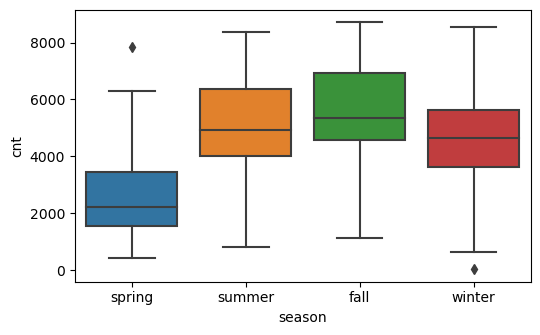

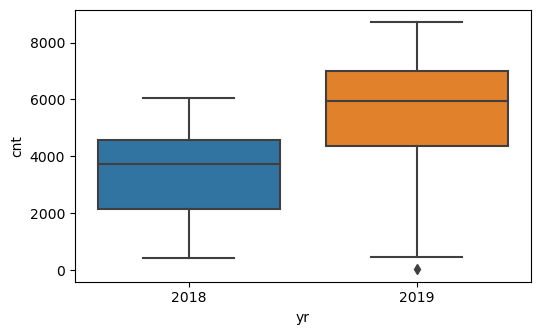

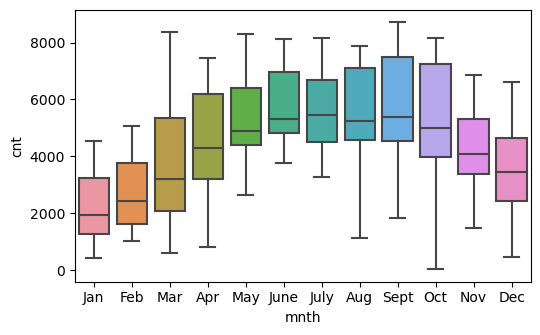

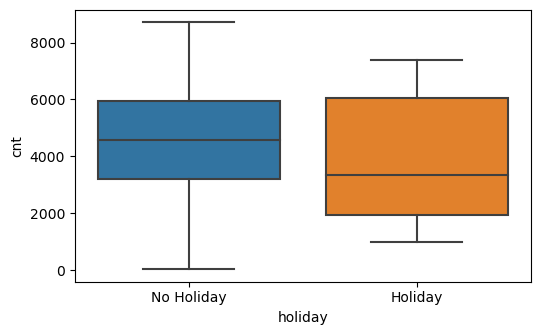

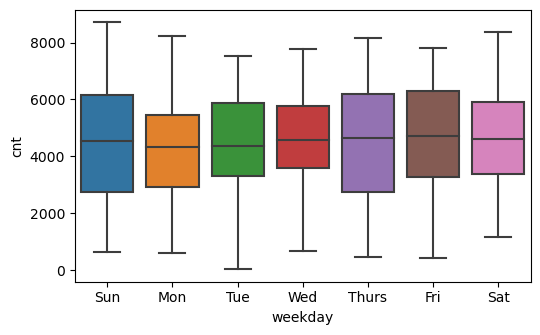

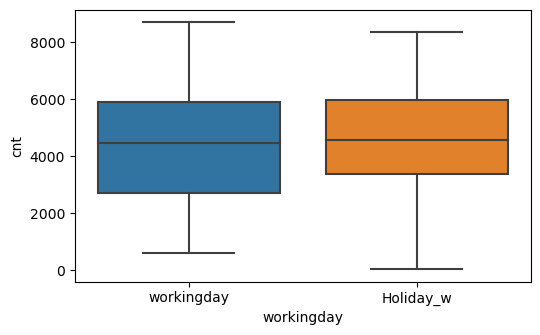

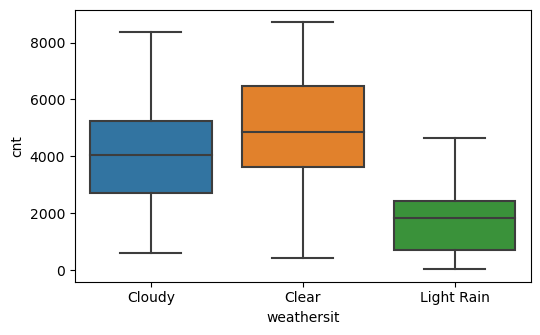

In [130]:
# Understanding outliers for Count of Passengers columns against all the other variables
def boxplt(datas):
    lst=['season','yr','mnth','holiday','weekday','workingday','weathersit']
    for i in enumerate(lst):
        plt.figure(figsize=(20,12))
        plt.subplot(3,3,7)
        sns.boxplot(x=i[1],y='cnt',data=datas)    #.set_title('Count of Passengers vs Various seasons')
        plt.show()
boxplt(df)


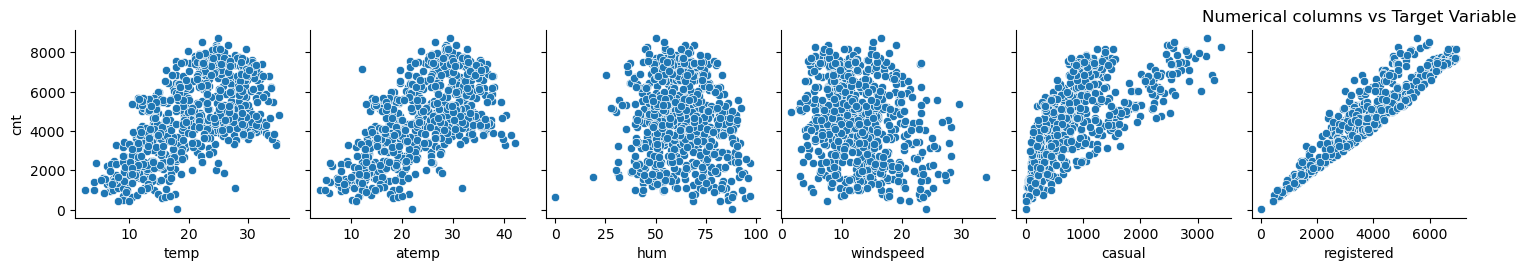

In [131]:
# Scatter plot for numerical variables against target variable
sns.pairplot(df,x_vars=["temp", "atemp", "hum",'windspeed','casual','registered'], y_vars=['cnt'])
plt.title("Numerical columns vs Target Variable")
plt.show()

In [132]:
# Converting categorical columns into dummy variables
dumm=pd.get_dummies(df[['yr','holiday','workingday','season','mnth','weekday','weathersit']],dtype=int,drop_first=True)
df2=pd.concat([df,dumm],axis=1)
df2=df2.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
df2.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Model Creation

In [133]:
# Create 70:30 split 
df_train,df_test=train_test_split(df2,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

scaler=MinMaxScaler()
col_scal=['temp','atemp','hum','windspeed','casual','registered','cnt']
# Scale all the numeric variables between 0 to 1
df_train[col_scal]=scaler.fit_transform(df_train[col_scal]) 
df_train.head()

(510, 32)
(220, 32)


,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [134]:
# Split training sets
y_train=df_train.pop('cnt')
X_train=df_train

In [135]:
# Data Training & model creation with all the variables
import statsmodels.api as sm
X_train_xm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_xm).fit()

lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.236e+29
Date:                Wed, 10 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:41:22   Log-Likelihood:                 16782.
No. Observations:                 510   AIC:                        -3.350e+04
Df Residuals:                     479   BIC:                        -3.337e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.681e-16   6.12e-16     -0.274      0.784   -1.37e-15    1.04e-15
temp                  -1.154e-15   2.07e-15     -0.557      0.578   -5.23e-15    2.92e-15
atemp                  1.067e-15      2e-15      0.534      0.593   -2.86e-15    4.99e-15
hum                    8.429e-16   5.65e-16      1.491      0.137   -2.68e-16    1.95e-15
windspeed             -1.612e-16      4e-16     -0.403      0.687   -9.47e-16    6.25e-16
casual                    0.3775   5.82e-16   6.49e+14      0.000       0.377       0.377
registered                0.7968   6.91e-16   1.15e+15      0.000       0.797       0.797
yr_2019               -2.332e-16   2.04e-16     -1.141      0.254   -6.35e-16    1.68e-16
holiday_No Holiday     4.372e-16   2.73e-16      1.600      0.110   -9.98e-17    9.74e-16
workingday_workingday -8.012e-17   2.34e-16     -0.343      0.732    -5.4e-16    3.79e-16
season_spring           -4.8e-16   4.34e-16     -1.106      0.269   -1.33e-15    3.73e-16
season_summer          -2.82e-16    3.8e-16     -0.742      0.458   -1.03e-15    4.65e-16
season_winter         -2.622e-17   4.14e-16     -0.063      0.949   -8.39e-16    7.87e-16
mnth_Aug              -7.111e-16   4.89e-16     -1.453      0.147   -1.67e-15     2.5e-16
mnth_Dec              -2.525e-16   4.86e-16     -0.519      0.604   -1.21e-15    7.03e-16
mnth_Feb               5.106e-17   4.76e-16      0.107      0.915   -8.85e-16    9.87e-16
mnth_Jan               7.688e-17   4.86e-16      0.158      0.874   -8.79e-16    1.03e-15
mnth_July              -3.52e-16   5.06e-16     -0.695      0.487   -1.35e-15    6.43e-16
mnth_June             -2.613e-16   3.62e-16     -0.722      0.471   -9.73e-16     4.5e-16
mnth_Mar               4.536e-17   3.55e-16      0.128      0.898   -6.51e-16    7.42e-16
mnth_May              -1.847e-16   3.07e-16     -0.602      0.547   -7.87e-16    4.18e-16
mnth_Nov                9.76e-18   5.26e-16      0.019      0.985   -1.02e-15    1.04e-15
mnth_Oct              -1.461e-16   5.19e-16     -0.281      0.778   -1.17e-15    8.74e-16
mnth_Sept             -5.817e-16   4.65e-16     -1.250      0.212    -1.5e-15    3.33e-16
weekday_Mon            2.203e-16   2.85e-16      0.773      0.440    -3.4e-16     7.8e-16
weekday_Sat            1.508e-16   2.27e-16      0.665      0.506   -2.95e-16    5.97e-16
weekday_Sun            2.749e-16   2.78e-16      0.988      0.324   -2.72e-16    8.22e-16
weekday_Thurs          1.234e-16   2.12e-16      0.582      0.561   -2.93e-16     5.4e-16
weekday_Tue            1.991e-16   2.19e-16      0.910      0.363   -2.31e-16    6.29e-16
weekday_Wed            1.207e-16   2.23e-16      0.542      0.588   -3.17e-16    5.58e-16
weathersit_Cloudy      9.124e-17   1.56e-16      0.586      0.558   -2.15e-16    3.97e-16
weathersit_Light Rain  

In [136]:
# ViF Understanding

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,holiday_No Holiday,145.87
0,temp,68.41
8,workingday_workingday,60.00
1,atemp,56.19
25,weekday_Sun,35.11
23,weekday_Mon,33.11
9,season_spring,10.84
11,season_winter,9.95
10,season_summer,8.40
5,registered,7.74


### Created mulitple OLS Model by testing out columns by removing adding based on VIF factor & Heatmap & P-Values acceptable region from OLS model. And below are the final columns dropped for better model values

In [137]:
# Drop Variable temp
X.drop(['atemp','holiday_No Holiday','workingday_workingday','registered','hum','season_spring','casual','mnth_July','mnth_Oct','weekday_Sun',
          'weekday_Sat','weekday_Mon','mnth_Mar','mnth_May','mnth_June','mnth_Feb','weekday_Thurs','mnth_Nov','mnth_Dec','weekday_Tue','mnth_Jan',
          'mnth_Aug','weekday_Wed'],axis=1, inplace=True)

In [138]:
# Fit the model again
X_train_cm = sm.add_constant(X)

ols_final = sm.OLS(y_train, X_train_cm).fit()
ols_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.53e-184
Time:                        20:41:23   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1209      0.017      7.140      0.000       0.088       0.154
temp                      0.5527      0.020     27.295      0.000       0.513       0.592
windspeed                -0.1552      0.026     -6.041      0.000      -0.206      -0.105
yr_2019                   0.2332      0.008     27.645      0.000       0.217       0.250
season_summer             0.0894      0.011      8.460      0.000       0.069       0.110
season_winter             0.1281      0.011     12.051      0.000       0.107       0.149
mnth_Sept                 0.0978      0.016      6.052      0.000       0.066       0.130
weathersit_Cloudy        -0.0767      0.009     -8.553      0.000      -0.094      -0.059
weathersit_Light Rain    -0.2785      0.025    -10.993      0.000      -0.328      -0.229
==============================================================================
Omnibus:                       65.957   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.715   Prob(JB):                     1.92e-31
Kurtosis:                       5.148   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span class="girk">Final Variables :</span> Finally, we get important variables which are Temprature, Windspeed, Year 2019, Summer Season, Winter Season, Cloudy weather, Light rain Weather and September Month. 


</b>Our equation of Multi-Linear regression line is: </b> 

$ y = 0.1209 + 0.5527  \times  temp -0.1552 \times windspeed + 0.2332 \times Year2019 + 0.0894 \times summer + 1.48 \times cloudy+ 0.1281 \times winter + 0.0978 \times sept -0.2785 \times light-rain $

## Residual Analysis

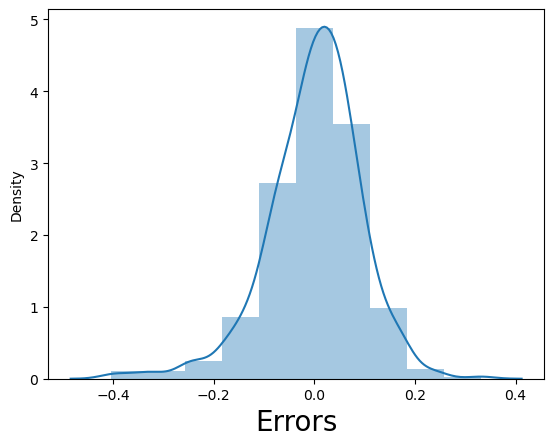

In [139]:
y_train_pred = lr_19.predict(X_train_cm)
res=y_train-y_train_pred
sns.distplot((res),bins=10)
plt.xlabel('Errors',fontsize=20)
plt.show()

Text(0, 0.5, 'y_pred')

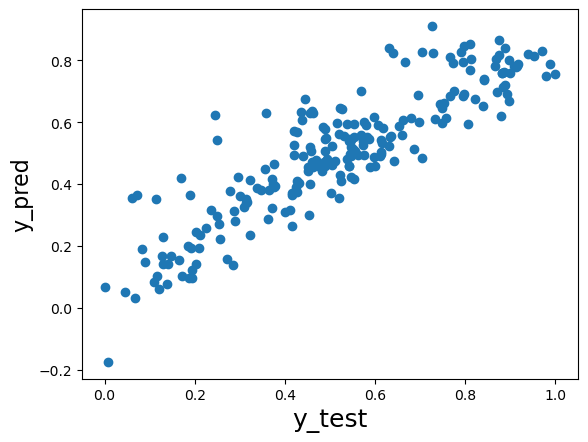

In [140]:
num_vars = ['temp','atemp','hum','casual','registered','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

X_test_am = sm.add_constant(X_test)
X_test_am = X_test_am.drop(['atemp','hum', 'casual', 'registered','holiday_No Holiday', 'workingday_workingday', 'season_spring','mnth_Aug', 
                            'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct',
                            'weekday_Mon', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis = 1)

y_pred_am = ols_final.predict(X_test_am)

r_sq = r2_score(y_test, y_pred_am)
r_sq

# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_am)
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 


# Final Equation


We can see that the equation of our best fitted line is:

</b> y = 0.1209 + 0.5527 * temp -0.1552 * windspeed + 0.2332 * Year2019 + 0.0894 * summer + 1.48 * cloudy+ 0.1281 * winter + 0.0978 * sept -0.2785 * light-rain $r</b>
